In [144]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

In [145]:
ds = make_blobs(random_state=28, centers=2, cluster_std=4.5, shuffle=1)
df = pd.DataFrame(ds[0], columns=['first', 'second'])
df['class'] = ds[1]
df.head(15)

C:\Users\dimon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


,first,second,class
0,-2.524672,5.509991,0
1,-13.433619,-1.698099,1
2,-3.429146,0.204845,1
3,1.869207,3.301294,0
4,-11.681285,-6.357410,1
5,-11.214032,4.703204,1
6,4.264361,9.229041,0
7,-4.744878,-0.153989,1
8,2.050991,-1.903319,0
9,4.388322,1.433953,0


<Axes: xlabel='first', ylabel='second'>

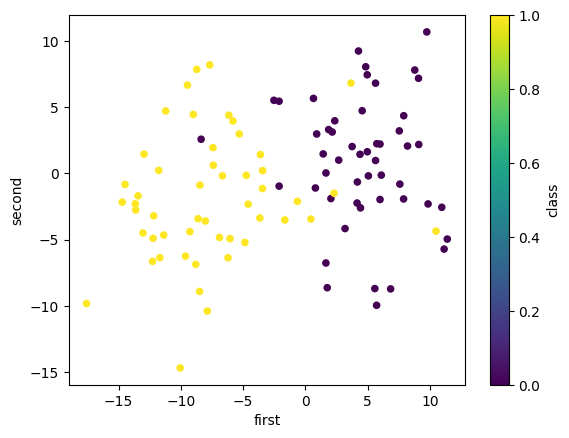

In [146]:
df.plot.scatter(x='first', y='second', c='class', colormap='viridis')

In [147]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(ds[0], ds[1])

<Axes: xlabel='first', ylabel='second'>

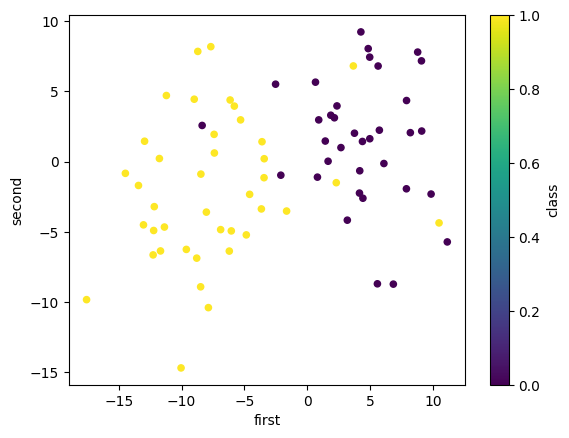

In [148]:
train_df = pd.DataFrame(x_train, columns=['first', 'second'])
train_df['class'] = y_train
train_df.plot.scatter(x='first', y='second', c='class', colormap='viridis')

<Axes: xlabel='first', ylabel='second'>

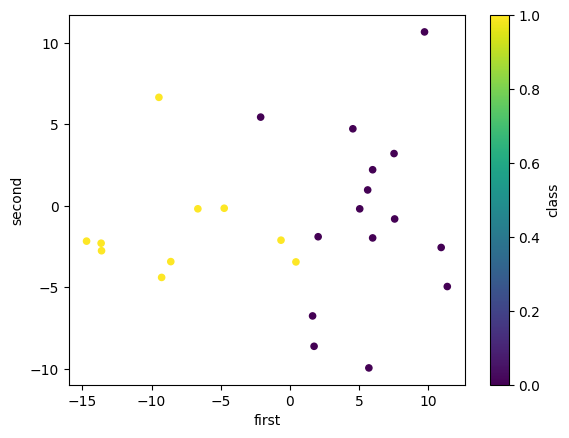

In [149]:
test_df = pd.DataFrame(x_test, columns=['first', 'second'])
test_df['class'] = y_test
test_df.plot.scatter(x='first', y='second', c='class', colormap='viridis')

In [150]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
from sklearn.inspection import DecisionBoundaryDisplay

def show_statistic(knn, x_test, y_test):
    knn.fit(x_train, y_train)
    prediction = knn.predict(x_test)
    
    print('Prediction and test: ')
    print(f"prediction: {prediction}")
    print(f"y_test: {y_test}")
    
    cm = confusion_matrix(y_test, prediction, labels=knn.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
    disp.plot()
    print(classification_report(y_test, prediction, target_names=['first', 'second']))
    print("AUC ROC: {:.2f}".format(roc_auc_score(y_test, prediction)))
    disp = DecisionBoundaryDisplay.from_estimator(knn, ds[0], response_method="predict")
    disp.ax_.scatter(ds[0][:,0], ds[0][:,1], c=ds[1], edgecolor="k")
    plt.show()

param = 1
Prediction and test: 
prediction: [0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0]
y_test: [0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0]
              precision    recall  f1-score   support

       first       1.00      0.87      0.93        15
      second       0.83      1.00      0.91        10

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25

AUC ROC: 0.93


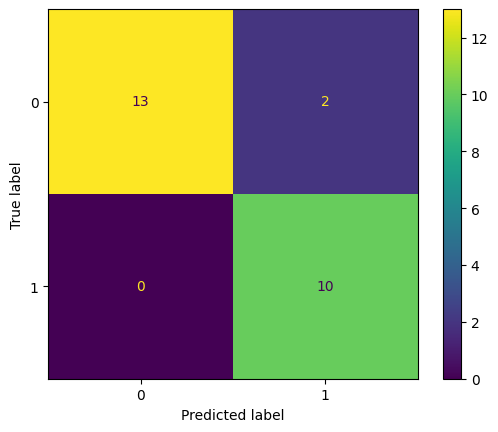

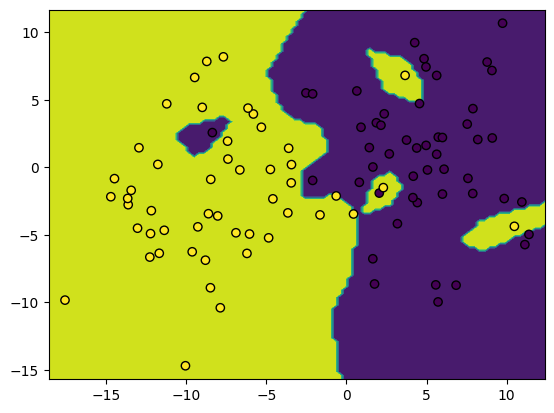

param = 3
Prediction and test: 
prediction: [0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0]
y_test: [0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0]
              precision    recall  f1-score   support

       first       0.94      1.00      0.97        15
      second       1.00      0.90      0.95        10

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25

AUC ROC: 0.95


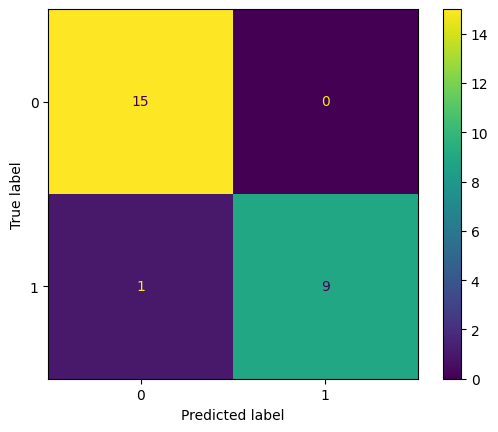

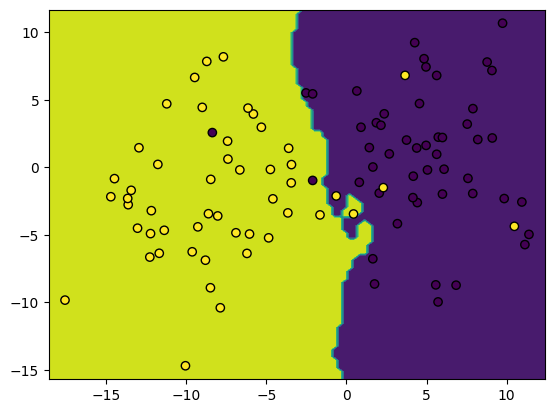

param = 5
Prediction and test: 
prediction: [0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0]
y_test: [0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0]
              precision    recall  f1-score   support

       first       0.94      1.00      0.97        15
      second       1.00      0.90      0.95        10

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25

AUC ROC: 0.95


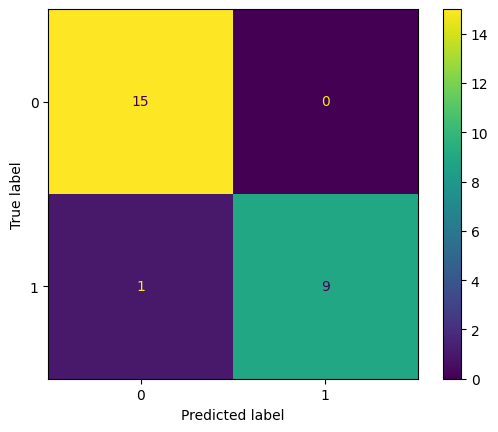

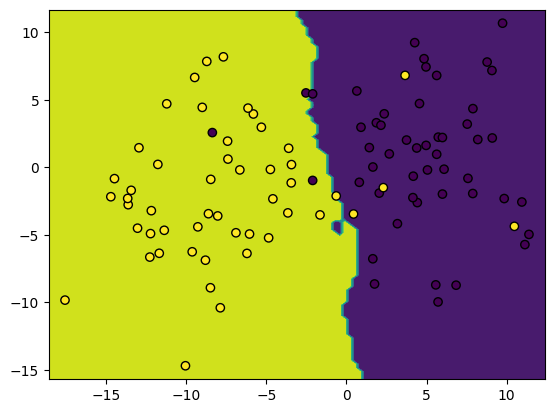

param = 9
Prediction and test: 
prediction: [0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0]
y_test: [0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0]
              precision    recall  f1-score   support

       first       0.94      1.00      0.97        15
      second       1.00      0.90      0.95        10

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25

AUC ROC: 0.95


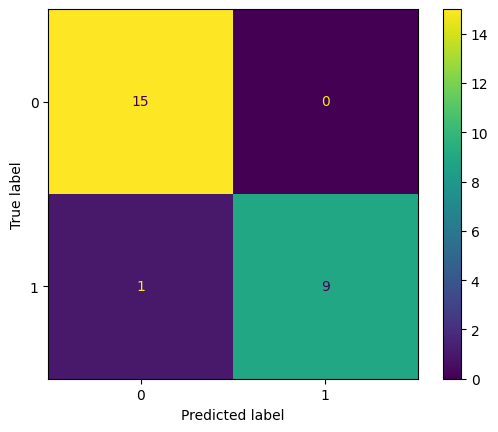

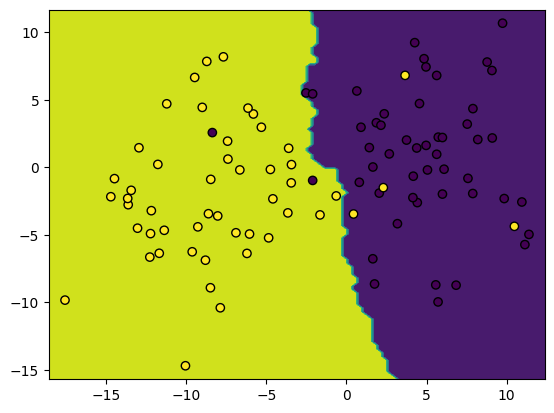

In [151]:
from sklearn.neighbors import KNeighborsClassifier

def test_KNeighthboursClassifier(neighbors_params):
    for param in neighbors_params:
        print(f"param = {param}")
        clf = KNeighborsClassifier(n_neighbors=param)
        show_statistic(clf, x_test, y_test)

test_KNeighthboursClassifier([1, 3, 5, 9])

Prediction and test: 
prediction: [0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0]
y_test: [0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0]
              precision    recall  f1-score   support

       first       0.88      0.93      0.90        15
      second       0.89      0.80      0.84        10

    accuracy                           0.88        25
   macro avg       0.88      0.87      0.87        25
weighted avg       0.88      0.88      0.88        25

AUC ROC: 0.87


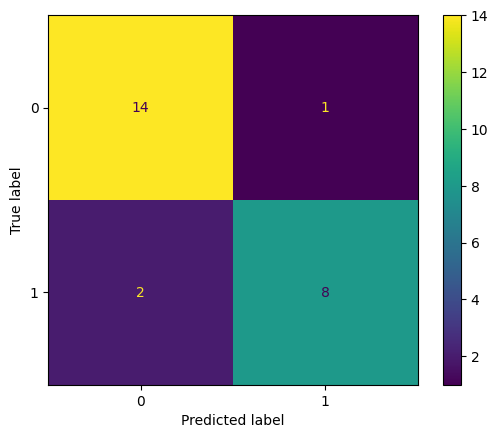

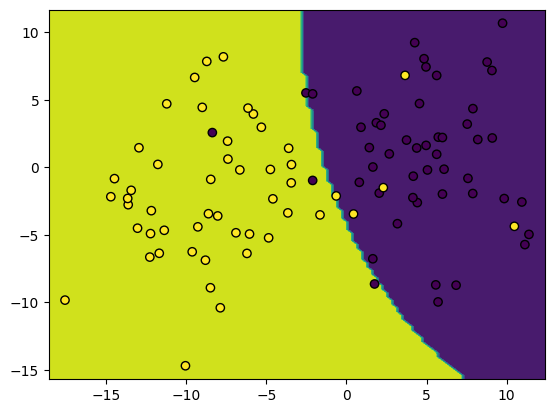

In [152]:
from sklearn.naive_bayes import GaussianNB

knn = GaussianNB()
knn.fit(x_train, y_train)
show_statistic(knn, x_test, y_test)

param = 5
Prediction and test: 
prediction: [1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0]
y_test: [0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0]
              precision    recall  f1-score   support

       first       0.93      0.93      0.93        15
      second       0.90      0.90      0.90        10

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

AUC ROC: 0.92


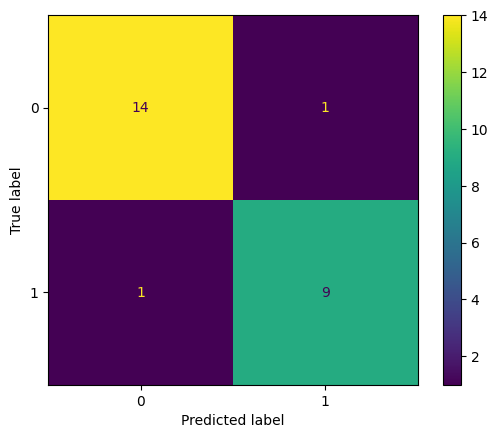

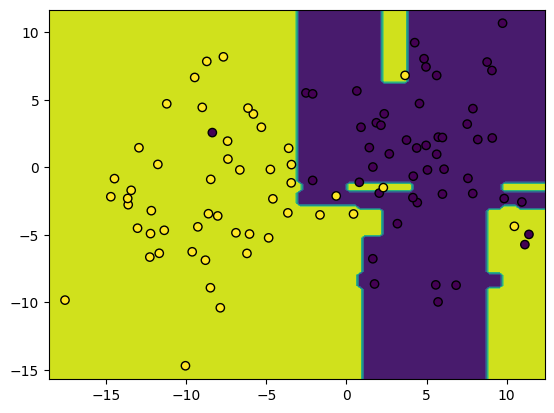

param = 10
Prediction and test: 
prediction: [1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0]
y_test: [0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0]
              precision    recall  f1-score   support

       first       1.00      0.87      0.93        15
      second       0.83      1.00      0.91        10

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25

AUC ROC: 0.93


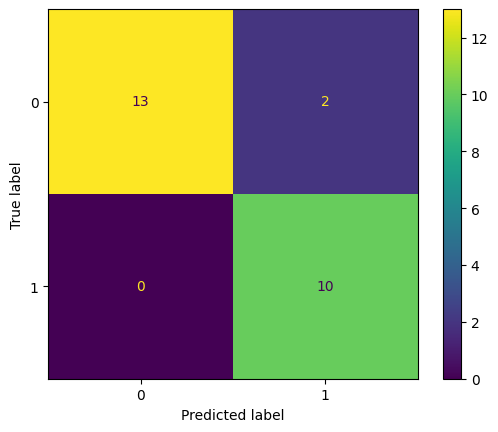

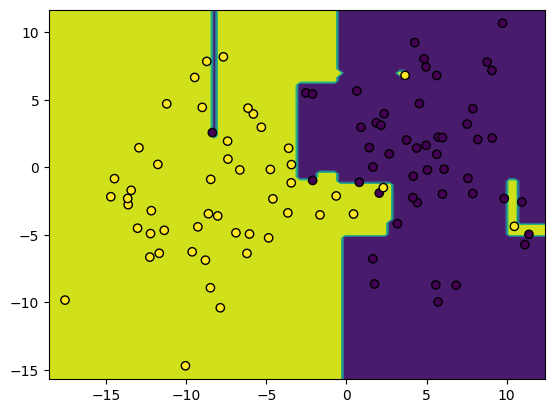

param = 15
Prediction and test: 
prediction: [1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0]
y_test: [0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0]
              precision    recall  f1-score   support

       first       1.00      0.87      0.93        15
      second       0.83      1.00      0.91        10

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25

AUC ROC: 0.93


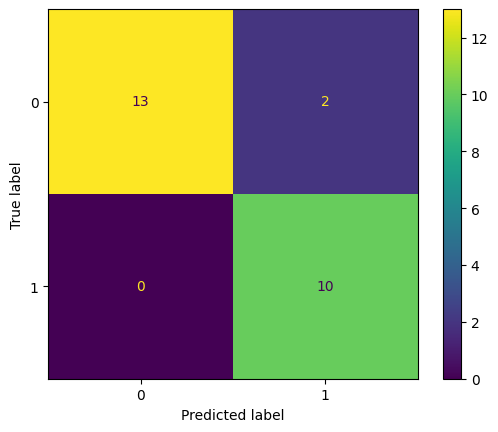

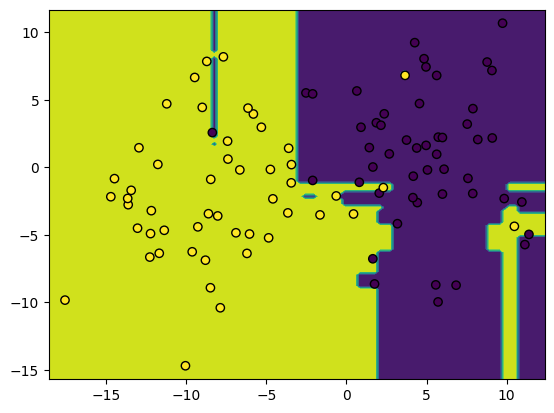

param = 20
Prediction and test: 
prediction: [0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0]
y_test: [0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0]
              precision    recall  f1-score   support

       first       1.00      0.93      0.97        15
      second       0.91      1.00      0.95        10

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25

AUC ROC: 0.97


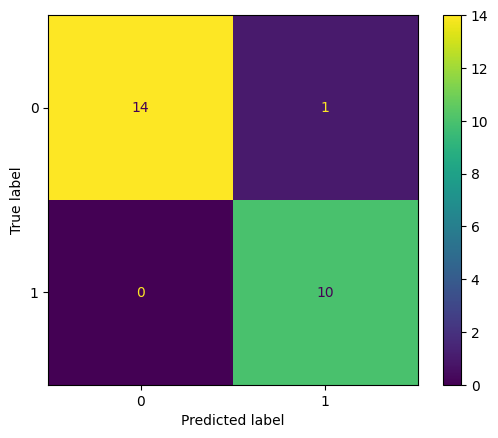

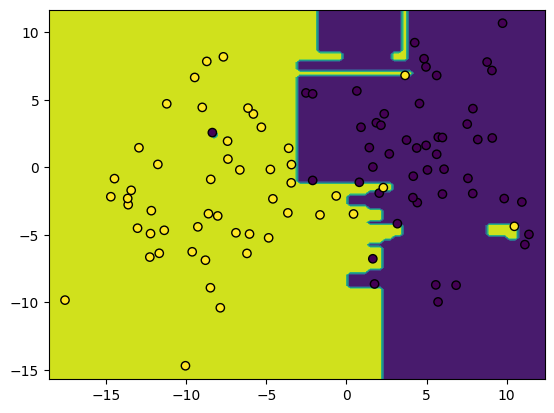

param = 50
Prediction and test: 
prediction: [1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0]
y_test: [0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0]
              precision    recall  f1-score   support

       first       0.93      0.93      0.93        15
      second       0.90      0.90      0.90        10

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

AUC ROC: 0.92


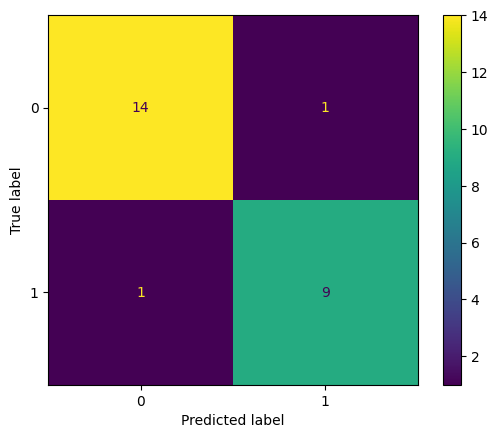

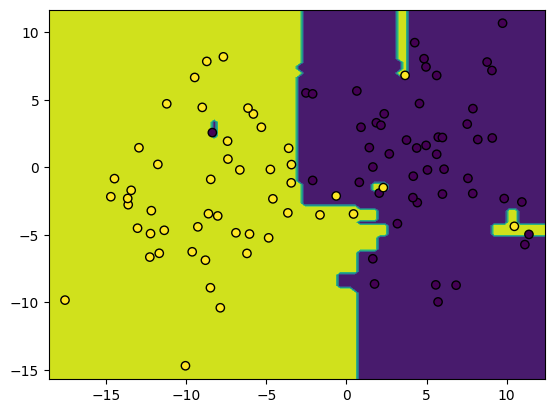

In [153]:
from sklearn.ensemble import RandomForestClassifier

def test_RandomForestClassifier(estimators_params):
    for param in estimators_params:
        print(f"param = {param}")
        clf = RandomForestClassifier(n_estimators=param)
        clf.fit(x_train, y_train)
        show_statistic(clf, x_test, y_test)

test_RandomForestClassifier([5, 10, 15, 20, 50])

<Axes: xlabel='first', ylabel='second'>

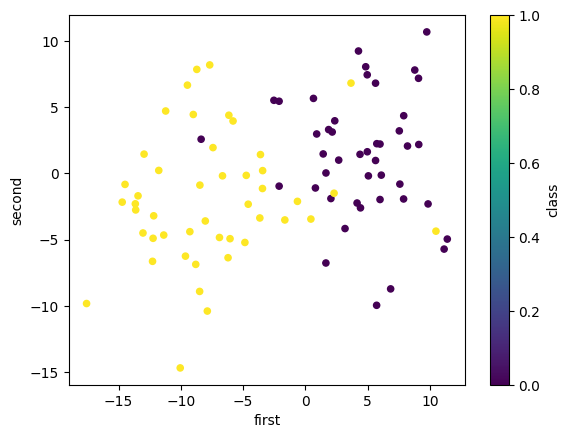

In [154]:
x_train, x_test, y_train, y_test = train_test_split(ds[0], ds[1], test_size=0.1)

train_df = pd.DataFrame(x_train, columns=['first', 'second'])
train_df['class'] = y_train
train_df.plot.scatter(x='first', y='second', c='class', colormap='viridis')

<Axes: xlabel='first', ylabel='second'>

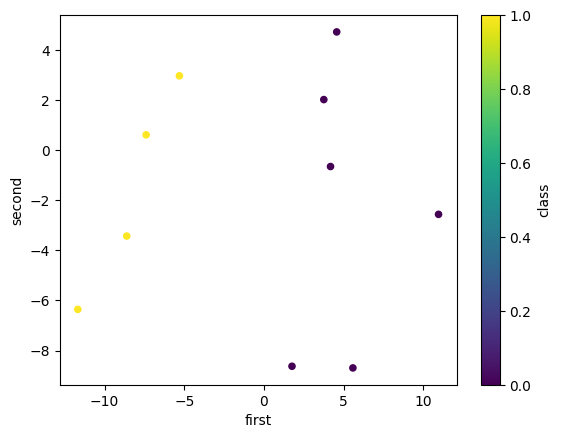

In [155]:
test_df = pd.DataFrame(x_test, columns=['first', 'second'])
test_df['class'] = y_test
test_df.plot.scatter(x='first', y='second', c='class', colormap='viridis')

param = 1
Prediction and test: 
prediction: [0 0 0 0 1 1 1 1 1 0]
y_test: [0 0 0 0 1 1 0 1 1 0]
              precision    recall  f1-score   support

       first       1.00      0.83      0.91         6
      second       0.80      1.00      0.89         4

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10

AUC ROC: 0.92


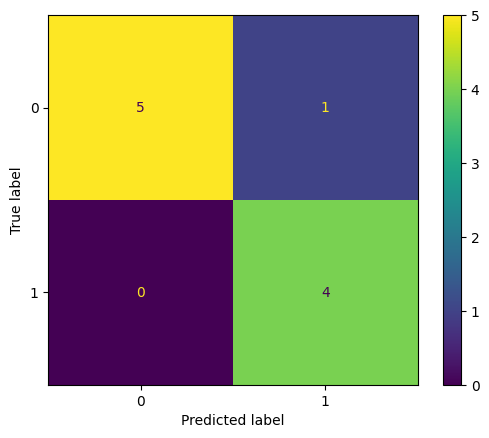

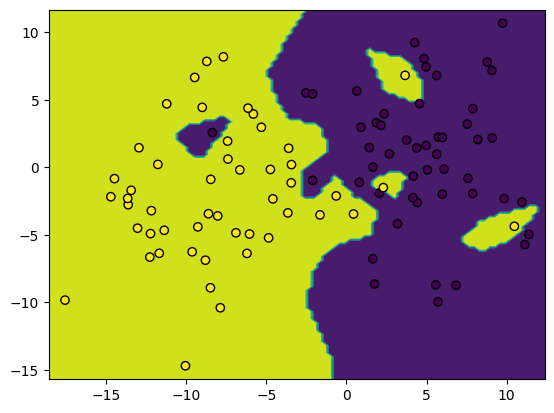

param = 3
Prediction and test: 
prediction: [0 0 0 0 1 1 0 1 1 0]
y_test: [0 0 0 0 1 1 0 1 1 0]
              precision    recall  f1-score   support

       first       1.00      1.00      1.00         6
      second       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

AUC ROC: 1.00


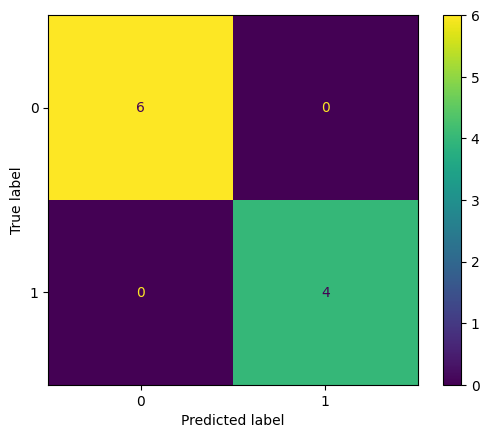

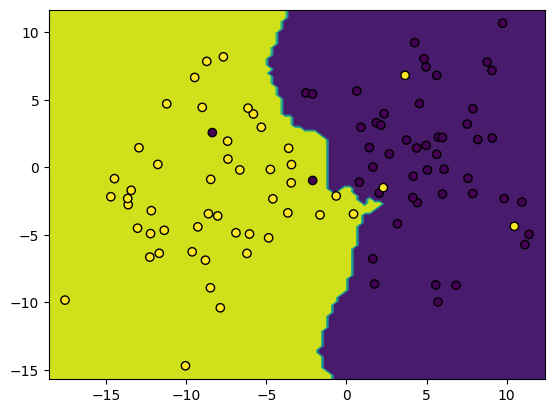

param = 5
Prediction and test: 
prediction: [0 0 0 0 1 1 0 1 1 0]
y_test: [0 0 0 0 1 1 0 1 1 0]
              precision    recall  f1-score   support

       first       1.00      1.00      1.00         6
      second       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

AUC ROC: 1.00


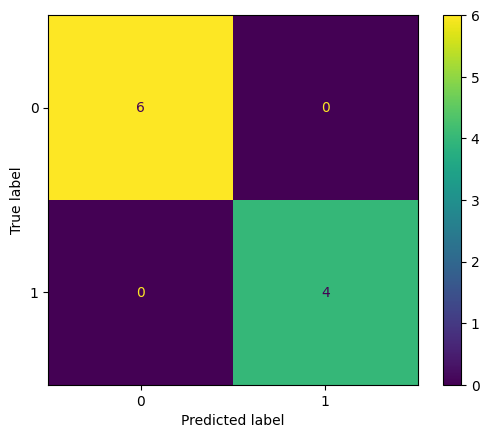

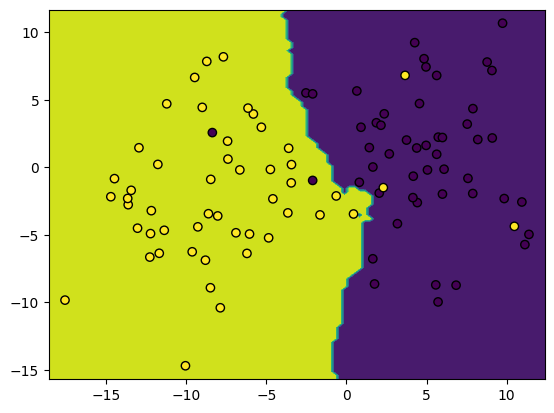

param = 9
Prediction and test: 
prediction: [0 0 0 0 1 1 0 1 1 0]
y_test: [0 0 0 0 1 1 0 1 1 0]
              precision    recall  f1-score   support

       first       1.00      1.00      1.00         6
      second       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

AUC ROC: 1.00


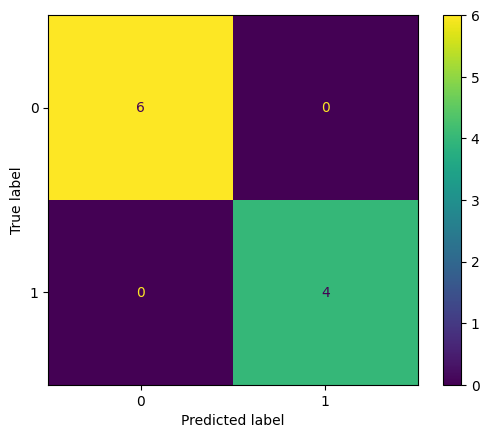

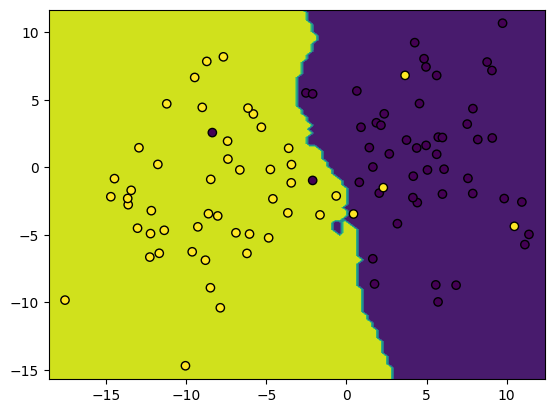

Prediction and test: 
prediction: [0 0 0 0 1 1 0 1 1 0]
y_test: [0 0 0 0 1 1 0 1 1 0]
              precision    recall  f1-score   support

       first       1.00      1.00      1.00         6
      second       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

AUC ROC: 1.00


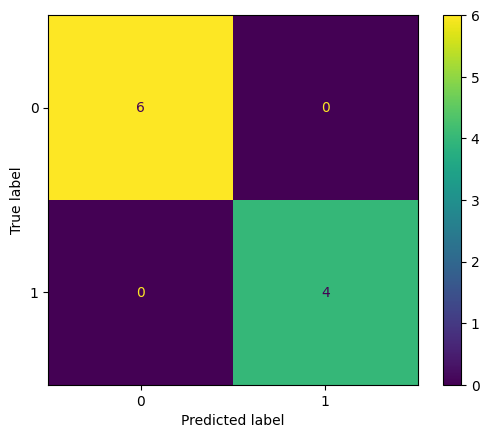

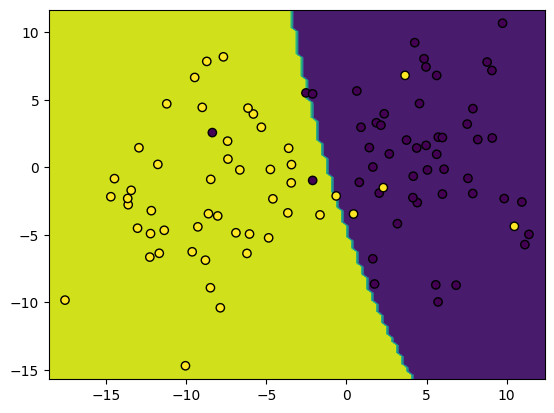

param = 5
Prediction and test: 
prediction: [1 0 0 0 1 0 0 1 1 0]
y_test: [0 0 0 0 1 1 0 1 1 0]
              precision    recall  f1-score   support

       first       0.83      0.83      0.83         6
      second       0.75      0.75      0.75         4

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10

AUC ROC: 0.79


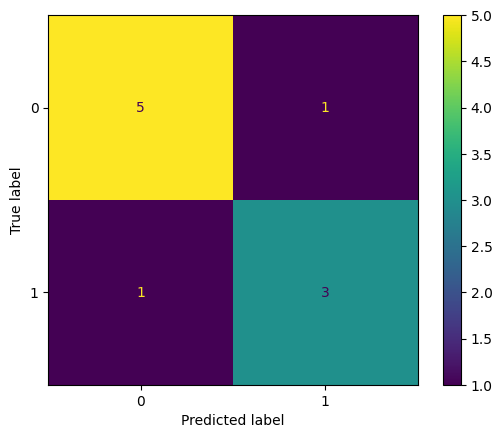

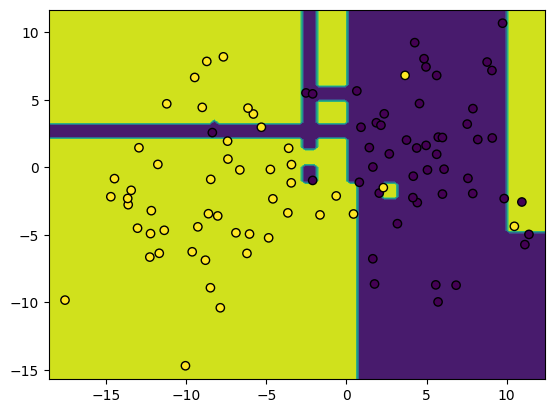

param = 10
Prediction and test: 
prediction: [0 0 0 0 1 1 0 1 1 0]
y_test: [0 0 0 0 1 1 0 1 1 0]
              precision    recall  f1-score   support

       first       1.00      1.00      1.00         6
      second       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

AUC ROC: 1.00


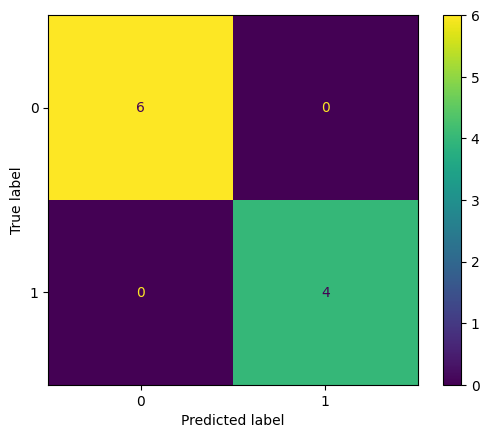

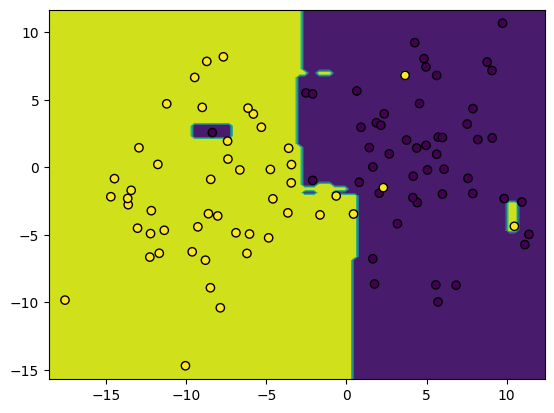

param = 15
Prediction and test: 
prediction: [0 0 0 0 1 1 0 1 1 0]
y_test: [0 0 0 0 1 1 0 1 1 0]
              precision    recall  f1-score   support

       first       1.00      1.00      1.00         6
      second       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

AUC ROC: 1.00


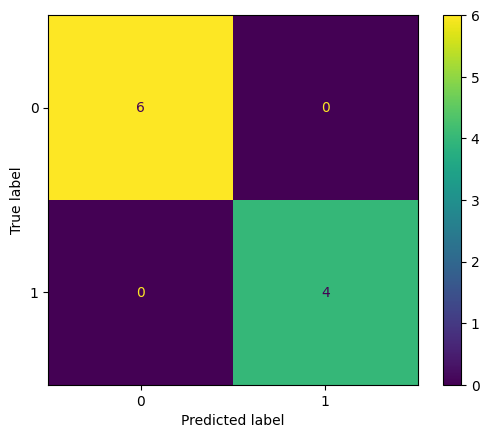

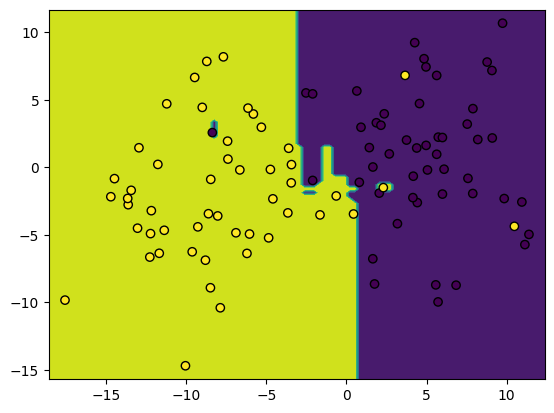

param = 20
Prediction and test: 
prediction: [0 0 0 0 1 1 0 1 1 0]
y_test: [0 0 0 0 1 1 0 1 1 0]
              precision    recall  f1-score   support

       first       1.00      1.00      1.00         6
      second       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

AUC ROC: 1.00


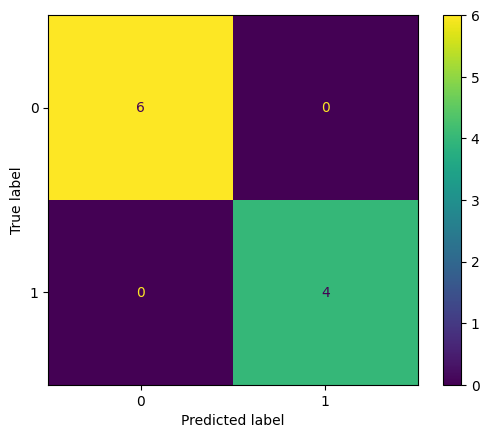

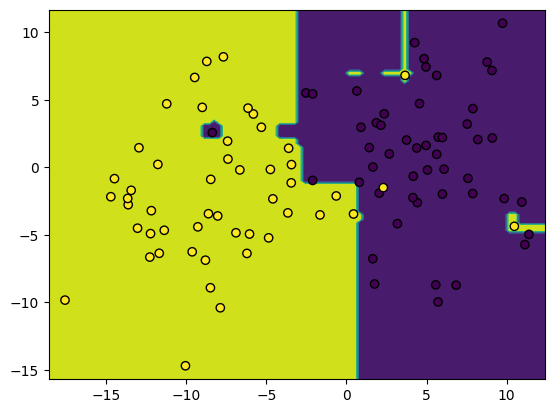

param = 50
Prediction and test: 
prediction: [0 0 0 0 1 1 0 1 1 0]
y_test: [0 0 0 0 1 1 0 1 1 0]
              precision    recall  f1-score   support

       first       1.00      1.00      1.00         6
      second       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

AUC ROC: 1.00


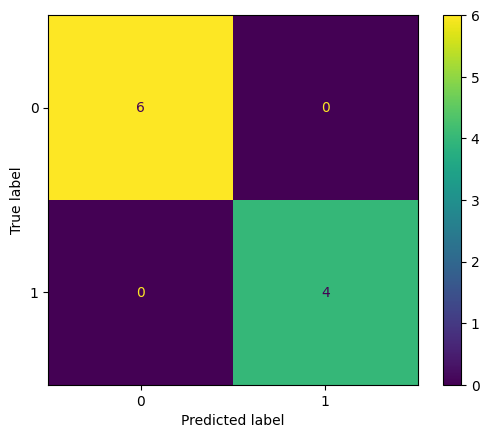

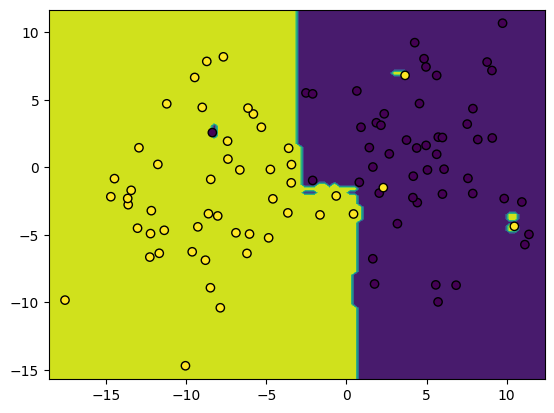

In [156]:
test_KNeighthboursClassifier([1, 3, 5, 9])

knn = GaussianNB()
knn.fit(x_train, y_train)
show_statistic(knn, x_test, y_test)

test_RandomForestClassifier([5, 10, 15, 20, 50])

<Axes: xlabel='first', ylabel='second'>

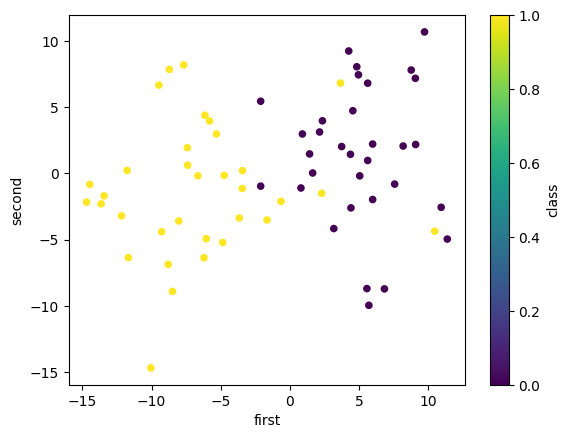

In [157]:
x_train, x_test, y_train, y_test = train_test_split(ds[0], ds[1], test_size=0.35)

train_df = pd.DataFrame(x_train, columns=['first', 'second'])
train_df['class'] = y_train
train_df.plot.scatter(x='first', y='second', c='class', colormap='viridis')

<Axes: xlabel='first', ylabel='second'>

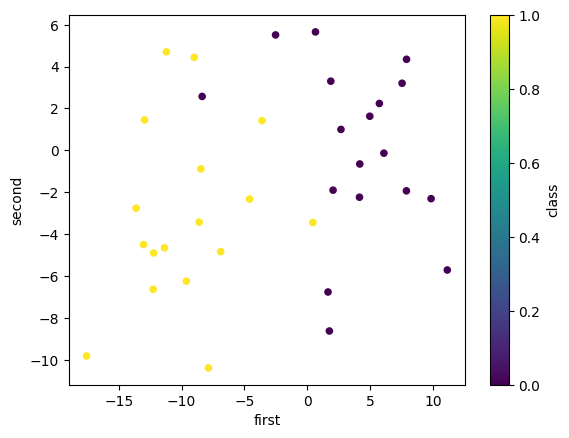

In [158]:
test_df = pd.DataFrame(x_test, columns=['first', 'second'])
test_df['class'] = y_test
test_df.plot.scatter(x='first', y='second', c='class', colormap='viridis')

param = 1
Prediction and test: 
prediction: [0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0]
y_test: [0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0]
              precision    recall  f1-score   support

       first       1.00      0.89      0.94        18
      second       0.89      1.00      0.94        17

    accuracy                           0.94        35
   macro avg       0.95      0.94      0.94        35
weighted avg       0.95      0.94      0.94        35

AUC ROC: 0.94


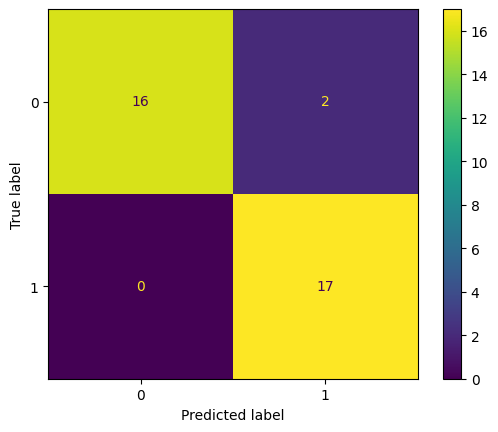

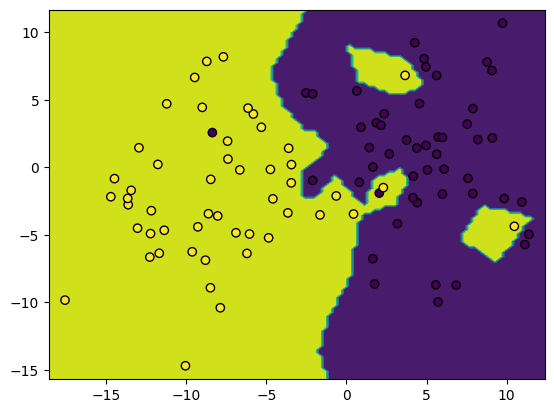

param = 3
Prediction and test: 
prediction: [0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0]
y_test: [0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0]
              precision    recall  f1-score   support

       first       1.00      0.89      0.94        18
      second       0.89      1.00      0.94        17

    accuracy                           0.94        35
   macro avg       0.95      0.94      0.94        35
weighted avg       0.95      0.94      0.94        35

AUC ROC: 0.94


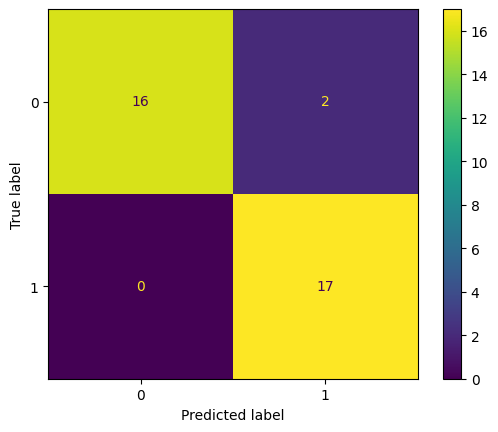

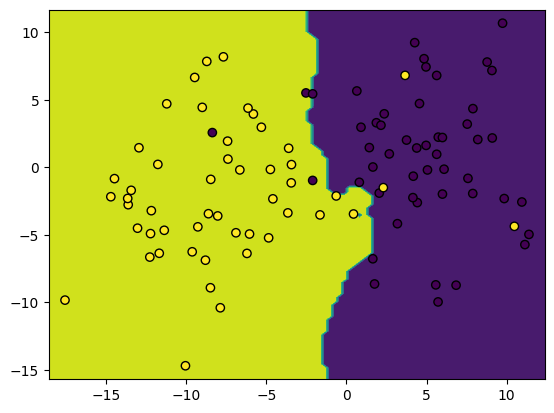

param = 5
Prediction and test: 
prediction: [0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0]
y_test: [0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0]
              precision    recall  f1-score   support

       first       1.00      0.89      0.94        18
      second       0.89      1.00      0.94        17

    accuracy                           0.94        35
   macro avg       0.95      0.94      0.94        35
weighted avg       0.95      0.94      0.94        35

AUC ROC: 0.94


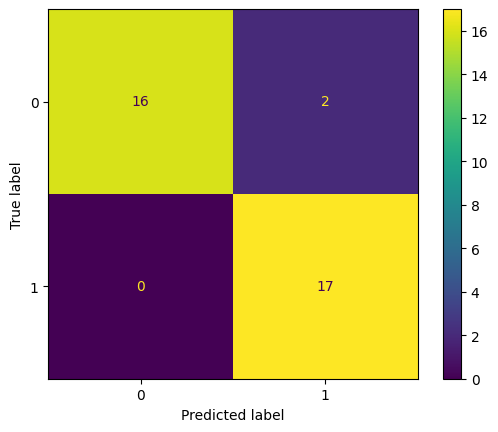

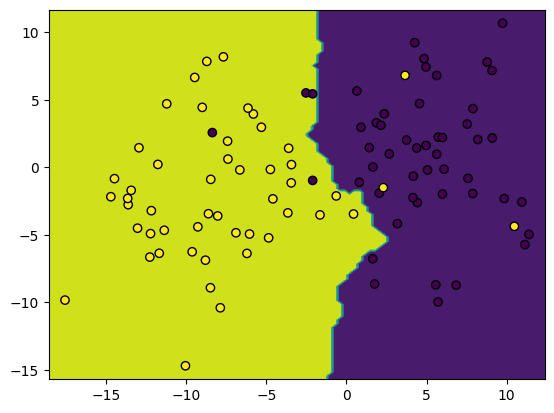

param = 9
Prediction and test: 
prediction: [0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0]
y_test: [0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0]
              precision    recall  f1-score   support

       first       0.94      0.94      0.94        18
      second       0.94      0.94      0.94        17

    accuracy                           0.94        35
   macro avg       0.94      0.94      0.94        35
weighted avg       0.94      0.94      0.94        35

AUC ROC: 0.94


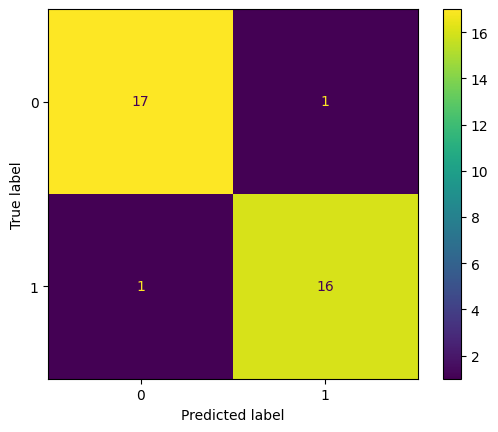

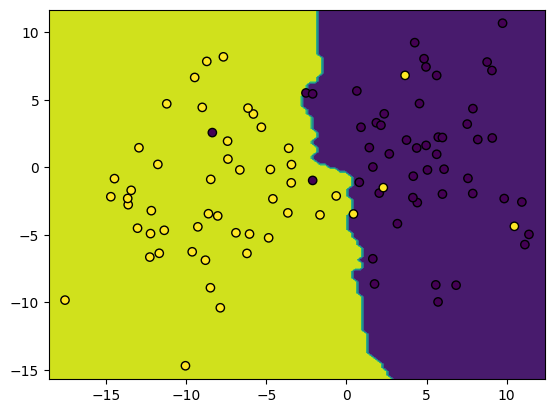

Prediction and test: 
prediction: [0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0]
y_test: [0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0]
              precision    recall  f1-score   support

       first       1.00      0.89      0.94        18
      second       0.89      1.00      0.94        17

    accuracy                           0.94        35
   macro avg       0.95      0.94      0.94        35
weighted avg       0.95      0.94      0.94        35

AUC ROC: 0.94


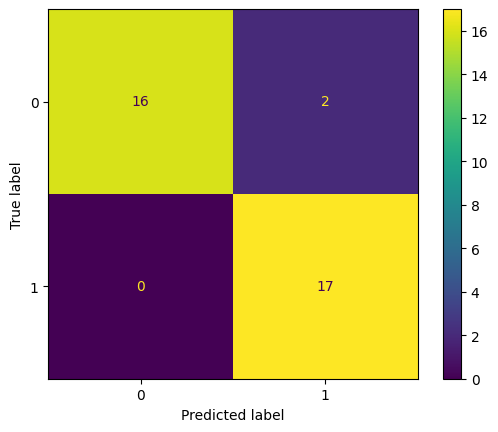

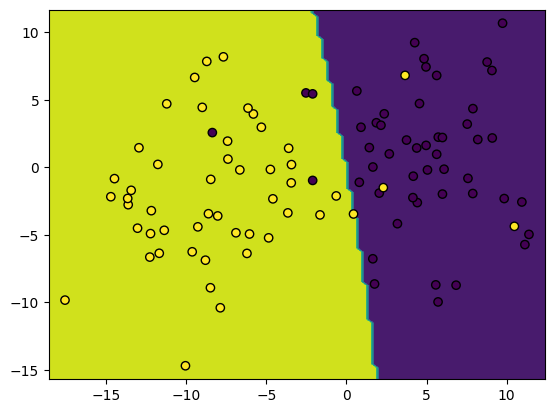

param = 5
Prediction and test: 
prediction: [0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0]
y_test: [0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0]
              precision    recall  f1-score   support

       first       1.00      0.83      0.91        18
      second       0.85      1.00      0.92        17

    accuracy                           0.91        35
   macro avg       0.93      0.92      0.91        35
weighted avg       0.93      0.91      0.91        35

AUC ROC: 0.92


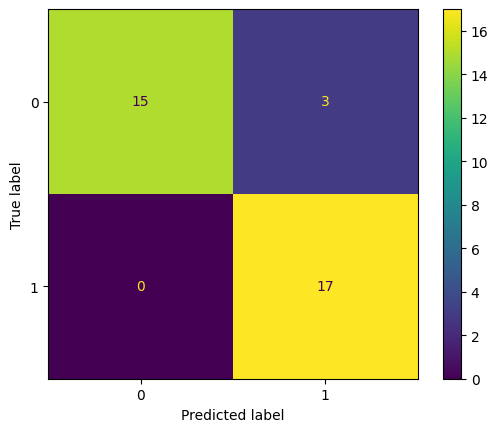

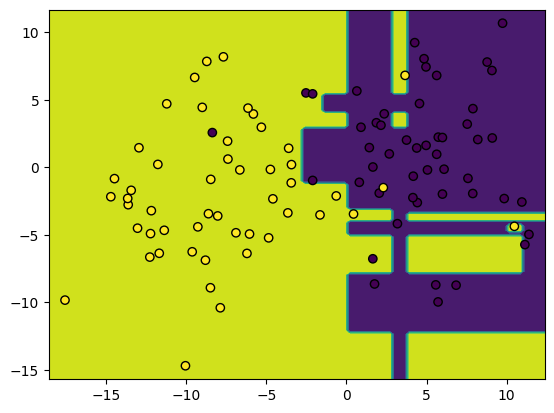

param = 10
Prediction and test: 
prediction: [0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0]
y_test: [0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0]
              precision    recall  f1-score   support

       first       1.00      0.89      0.94        18
      second       0.89      1.00      0.94        17

    accuracy                           0.94        35
   macro avg       0.95      0.94      0.94        35
weighted avg       0.95      0.94      0.94        35

AUC ROC: 0.94


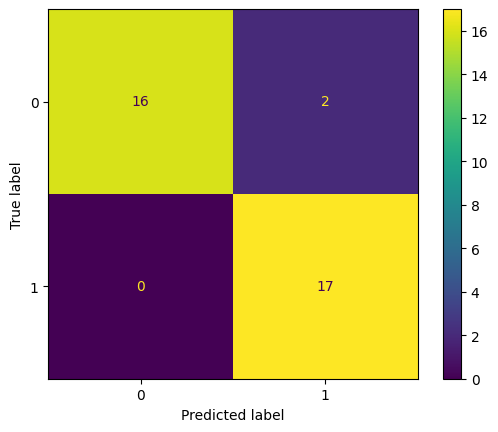

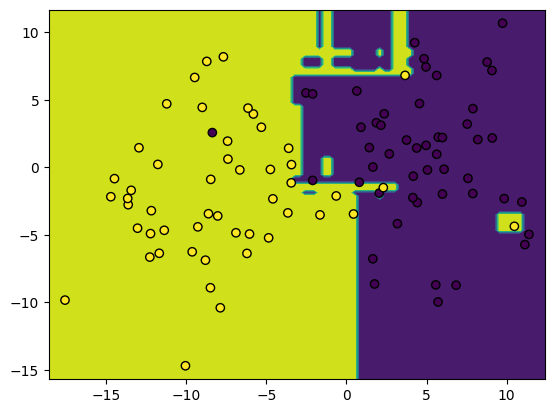

param = 15
Prediction and test: 
prediction: [0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0]
y_test: [0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0]
              precision    recall  f1-score   support

       first       1.00      0.89      0.94        18
      second       0.89      1.00      0.94        17

    accuracy                           0.94        35
   macro avg       0.95      0.94      0.94        35
weighted avg       0.95      0.94      0.94        35

AUC ROC: 0.94


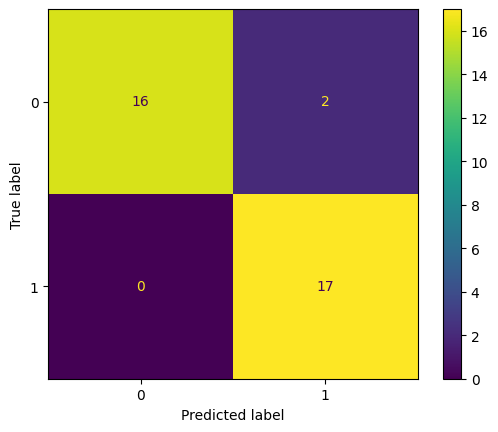

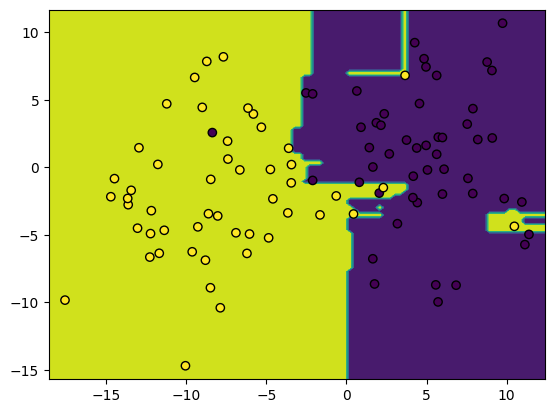

param = 20
Prediction and test: 
prediction: [0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0]
y_test: [0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0]
              precision    recall  f1-score   support

       first       0.94      0.94      0.94        18
      second       0.94      0.94      0.94        17

    accuracy                           0.94        35
   macro avg       0.94      0.94      0.94        35
weighted avg       0.94      0.94      0.94        35

AUC ROC: 0.94


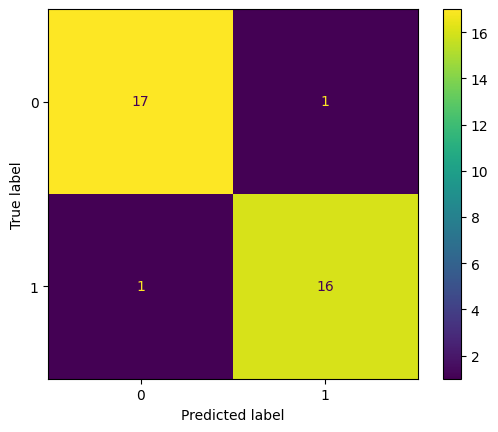

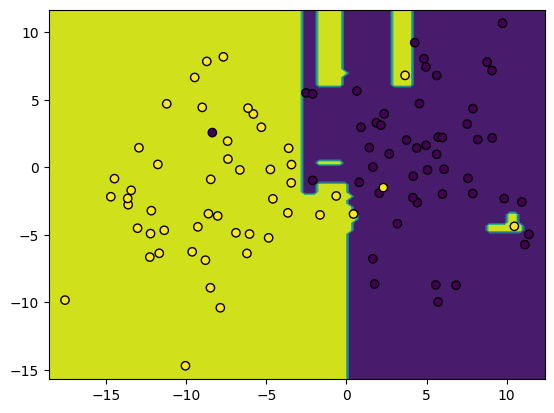

param = 50
Prediction and test: 
prediction: [0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0]
y_test: [0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0]
              precision    recall  f1-score   support

       first       1.00      0.83      0.91        18
      second       0.85      1.00      0.92        17

    accuracy                           0.91        35
   macro avg       0.93      0.92      0.91        35
weighted avg       0.93      0.91      0.91        35

AUC ROC: 0.92


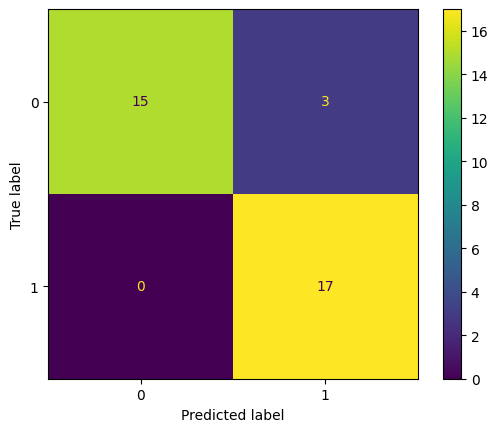

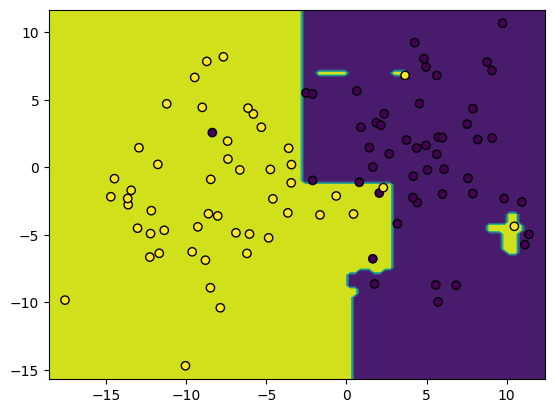

In [159]:
test_KNeighthboursClassifier([1, 3, 5, 9])

knn = GaussianNB()
knn.fit(x_train, y_train)
show_statistic(knn, x_test, y_test)

test_RandomForestClassifier([5, 10, 15, 20, 50])